In [17]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import os
import json
import sys
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import MO  # Monday as start of week

# Append utils to path for logo import
sys.path.append("utils")
from logo import add_logo

date = 'April 14th, 2025'


Failed to add logo: [Errno 2] No such file or directory: 'C:\\Users\\JamesEvans\\Documents\\Research\\hyperliquid-data-cuts\\rv_lockup_sec.png'


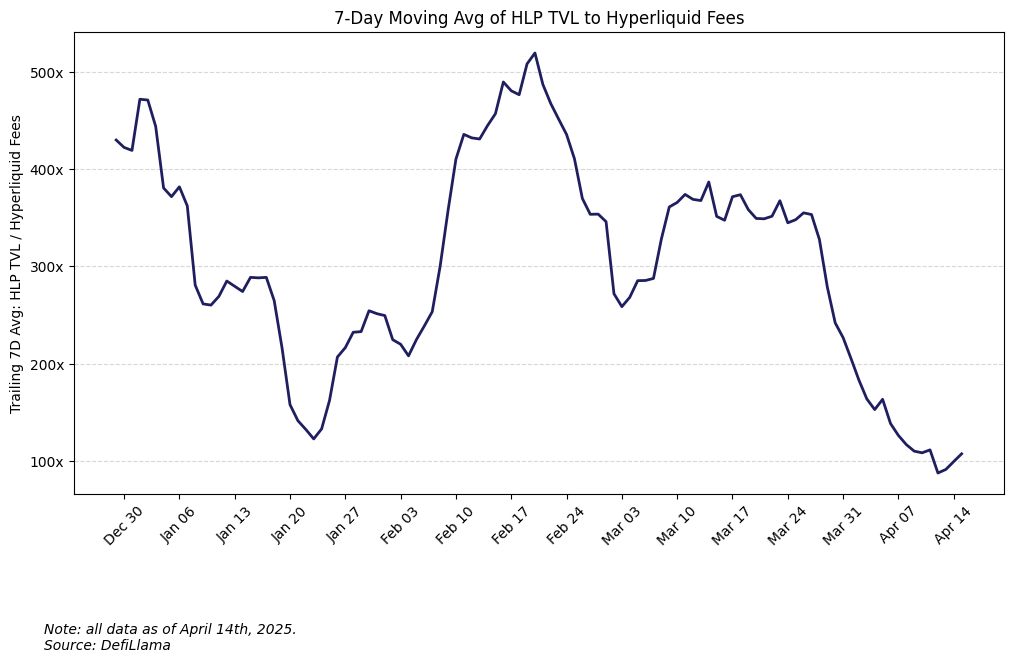

          date           tvl     fees  tvl-to-fees  tvl-to-fees-7d
103 2025-04-06  1.595744e+08  1772829    90.011170      138.553810
104 2025-04-07  1.568473e+08  3117000    50.319942      126.304420
105 2025-04-08  1.499814e+08  1746313    85.884597      116.903407
106 2025-04-09  1.482302e+08  2837027    52.248431      110.154291
107 2025-04-10  1.498008e+08  1686123    88.843334      108.456529
108 2025-04-11  1.495930e+08  1327396   112.696559      111.473799
109 2025-04-12  1.559157e+08  1164323   133.911057       87.702156
110 2025-04-13  1.576559e+08  1365048   115.494737       91.342665
111 2025-04-14  1.598938e+08  1491560   107.199012       99.468247
112 2025-04-15  1.603078e+08  1132766   141.518875      107.416001


In [18]:
# HLP TVL / Hyperliquid total fees multiple

# Load Hyperliquid fees data
with open("raw-data/defillama_hyperliquid-fees.json", "r") as f:
    fee_data = json.load(f)

fee_df = pd.DataFrame(fee_data["totalDataChart"], columns=["timestamp", "fees"])
fee_df["date"] = pd.to_datetime(fee_df["timestamp"], unit="s")
fee_df = fee_df[["date", "fees"]]

# Load HLP TVL data
with open("raw-data/defillama_HLP.json", "r") as f:
    hlp_data = json.load(f)

hlp_raw = hlp_data["chainTvls"]["Hyperliquid"]["tvl"]
hlp_df = pd.DataFrame(hlp_raw)
hlp_df["date"] = pd.to_datetime(hlp_df["date"], unit="s")
hlp_df = hlp_df.rename(columns={"totalLiquidityUSD": "tvl"})
hlp_df = hlp_df[["date", "tvl"]]

# Merge datasets
df = pd.merge(hlp_df, fee_df, on="date", how="inner")
df["tvl-to-fees"] = df["tvl"] / df["fees"]

# Calculate trailing 7-day average
df["tvl-to-fees-7d"] = df["tvl-to-fees"].rolling(window=7).mean()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df["date"], df["tvl-to-fees-7d"], color="#1f1f60", linewidth=2, label="7D Avg")

# X-axis formatting for weekly ticks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Y-axis formatting
ax.set_ylabel("Trailing 7D Avg: HLP TVL / Hyperliquid Fees")
ax.set_title("7-Day Moving Avg of HLP TVL to Hyperliquid Fees")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}x'))

# X-axis formatting: show ticks weekly, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
add_logo(ax, position=(0.05, -0.21))
plt.figtext(0.1, -0.15, f"Note: all data as of {date}.\nSource: DefiLlama", ha='left', fontsize=10, style='italic')

# Save plot
if not os.path.exists("plots"):
    os.makedirs("plots")
plt.savefig("plots/tvl-to-fees_ratio_7d_avg.png", dpi=300, bbox_inches='tight')
plt.show()

# Print sample of the dataset with 7D average
print(df[["date", "tvl", "fees", "tvl-to-fees", "tvl-to-fees-7d"]].tail(10))

Failed to add logo: [Errno 2] No such file or directory: 'C:\\Users\\JamesEvans\\Documents\\Research\\hyperliquid-data-cuts\\rv_lockup_sec.png'


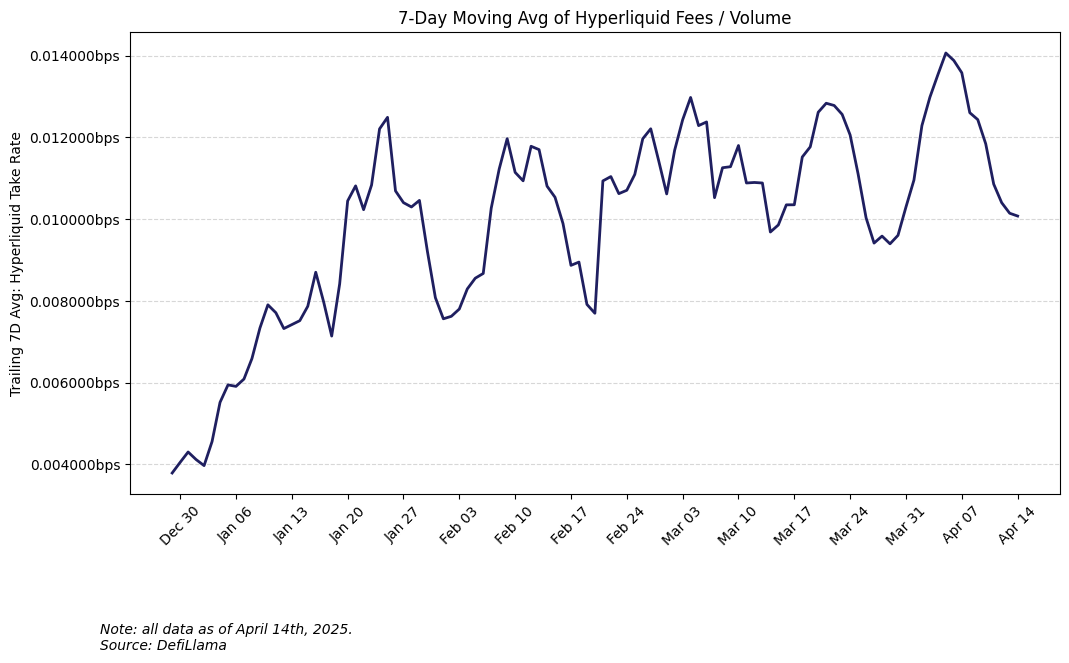

          date     fees    volumes  take-rate  take-rate-7d
102 2025-04-05   545156   42672433   0.012775      0.014063
103 2025-04-06  1772829  148050393   0.011974      0.013880
104 2025-04-07  3117000  254918742   0.012227      0.013579
105 2025-04-08  1746313  163870707   0.010657      0.012603
106 2025-04-09  2837027  256513559   0.011060      0.012433
107 2025-04-10  1686123  165359677   0.010197      0.011841
108 2025-04-11  1327396  187070232   0.007096      0.010855
109 2025-04-12  1164323  121367900   0.009593      0.010401
110 2025-04-13  1365048  134246965   0.010168      0.010143
111 2025-04-14  1491560  126974634   0.011747      0.010074


In [19]:
# HLP TVL / Hyperliquid total fees multiple

# Load Hyperliquid fees data
with open("raw-data/defillama_hyperliquid-fees.json", "r") as f:
    fee_data = json.load(f)

fee_df = pd.DataFrame(fee_data["totalDataChart"], columns=["timestamp", "fees"])
fee_df["date"] = pd.to_datetime(fee_df["timestamp"], unit="s")
fee_df = fee_df[["date", "fees"]]

# Load Hyperliquid volume  data
with open("raw-data/defillama_hyperliquid-volumes.json", "r") as f:
    volume_data = json.load(f)

volume_df = pd.DataFrame(volume_data["totalDataChart"], columns=["timestamp", "volumes"])
volume_df["date"] = pd.to_datetime(volume_df["timestamp"], unit="s")
volume_df = volume_df[["date", "volumes"]]

# Merge datasets
df = pd.merge(volume_df, fee_df, on="date", how="inner")
df["take-rate"] = df["fees"] / df["volumes"]

# Calculate trailing 7-day average
df["take-rate-7d"] = df["take-rate"].rolling(window=7).mean()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df["date"], df["take-rate-7d"], color="#1f1f60", linewidth=2, label="7D Avg")

# X-axis formatting for weekly ticks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# Y-axis formatting
ax.set_ylabel("Trailing 7D Avg: Hyperliquid Take Rate")
ax.set_title("7-Day Moving Avg of Hyperliquid Fees / Volume")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:f}bps'))

# X-axis formatting: show ticks weekly, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
add_logo(ax, position=(0.05, -0.21))
plt.figtext(0.1, -0.15, f"Note: all data as of {date}.\nSource: DefiLlama", ha='left', fontsize=10, style='italic')

# Save plot
if not os.path.exists("plots"):
    os.makedirs("plots")
plt.savefig("plots/take-rate_7d_avg.png", dpi=300, bbox_inches='tight')
plt.show()

# Print sample of the dataset with 7D average
print(df[["date", "fees", "volumes", "take-rate", "take-rate-7d"]].tail(10))